# Q.No.3 Sales of products in four different regions is tabulated for males and females. Find if male-female buyer rations are similar across regions.
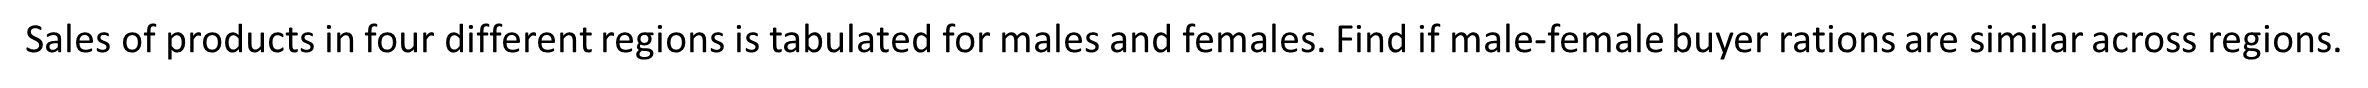

In [1]:
import pandas as pd
from scipy import stats as stats
import numpy as np

In [2]:
df= pd.read_csv('BuyerRatio.csv')

In [3]:
df.head()

,Observed Values,East,West,North,South
0,Males,50,142,131,70
1,Females,435,1523,1356,750


In [4]:
df_table=df.iloc[:,1:6]
df_table

,East,West,North,South
0,50,142,131,70
1,435,1523,1356,750


In [5]:
df_table.values

array([[  50,  142,  131,   70],
       [ 435, 1523, 1356,  750]], dtype=int64)

In [6]:
val=stats.chi2_contingency(df_table)

In [7]:
val

(1.595945538661058,
 0.6603094907091882,
 3,
 array([[  42.76531299,  146.81287862,  131.11756787,   72.30424052],
        [ 442.23468701, 1518.18712138, 1355.88243213,  747.69575948]]))

In [8]:
type(val)

tuple

In [9]:
no_of_rows=len(df_table.iloc[0:2,0])
no_of_columns=len(df_table.iloc[0,0:4])
degree_of_f=(no_of_rows-1)*(no_of_columns-1)
print('Degree of Freedom=',degree_of_f)


Degree of Freedom= 3


In [10]:
Expected_value=val[3]

In [11]:
Expected_value

array([[  42.76531299,  146.81287862,  131.11756787,   72.30424052],
       [ 442.23468701, 1518.18712138, 1355.88243213,  747.69575948]])

In [18]:
from scipy.stats import chi2
chi_square=sum([(o-e)**2/e for o,e in zip(df_table.values,Expected_value)])
chi_square_statestic=chi_square[0]+chi_square[1]
chi_square_statestic

1.5152956451130446

In [19]:
critical_value=chi2.ppf(0.95,3)
critical_value

7.814727903251179

In [20]:
if chi_square_statestic >= critical_value:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

Independent (fail to reject H0)


In [21]:
pvalue=1-chi2.cdf(chi_square_statestic,3)
pvalue

0.6787446296467897

In [16]:
if pvalue <= 0.05:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

Independent (fail to reject H0)


In [23]:
no_of_columns

4

In [24]:
no_of_rows

2

In [25]:
df_table=pd.crosstab(df['East'],df['Observed Values'])
df_table

Observed Values,Females,Males
East,,
50,0,1
435,1,0


In [26]:
df_table.values

array([[0, 1],
       [1, 0]], dtype=int64)